<a href="https://colab.research.google.com/github/sejin-sim/Data_Mining/blob/main/0_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * 자주 쓰는 데이터 시각화 코드 정리


# 0. Pandas

* 기본적인 데이터 확인



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('sample_data/mnist_test.csv')
df.info()
# df.describe()
# df.query("@@@")  @@@에 필터링 조건을 넣어야 한다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


# 1. Matplotlib

* 파이썬에서 가장 많이쓰는 라이브러리.
* pandas의 Dataframe을 바로 시각화할 때도 내부적으로 matplotlib을 사용

---
* import matplotlib.pyplot as plt
* Figure : 도화지
* Axes : plot이 그려지는 공간
* Axis : plot의 축
---
* 선의 포맷팅 : https://kongdols-room.tistory.com/82
* 범례 포맷팅 : https://wikidocs.net/4762





<Figure size 432x288 with 0 Axes>

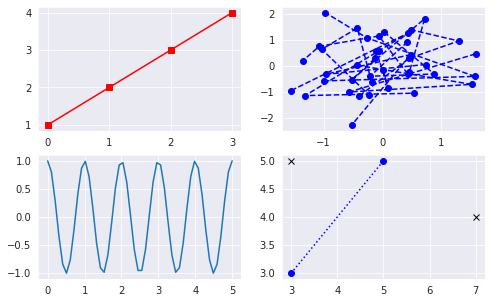

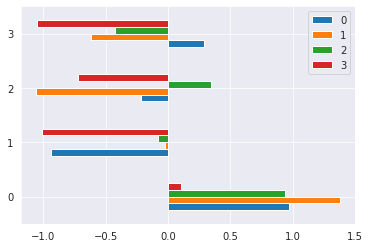

In [ ]:
# basic
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()                       # 도화지를 생성
# fig.suptitle('ggplot style')             # 표의 전체적 style 지정
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5)) # suptitle 도화지를 분활. 2행 x 2열로 각 8 x 5 사이즈

ax_lst[0][0].plot([1,2,3,4], 'rs-')                                                   # red + marker 모양 suard + 실선
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')              # blue + o + 대시선
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))   # linspace 선형 그래프
ax_lst[1][1].plot([3,5], [3,5], 'bo:')                                                # blue + maker 모양 o + : 점선
ax_lst[1][1].plot([3,7], [5,4], 'kx')                                                 # black + x 모양
plt.show() # 보여줘

df = pd.DataFrame(np.random.randn(4,4)) # df : data변수
df.plot(kind='barh')




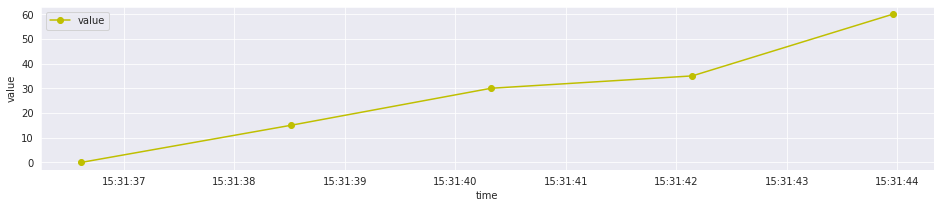

In [ ]:
# line chart (시계열)
import datetime as dt
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,3))

plot_data = [
    ["2013-03-18 15:31:36.617",0],
    ["2013-03-18 15:31:38.511",15],
    ["2013-03-18 15:31:40.324",30],
    ["2013-03-18 15:31:42.144",35],
    ["2013-03-18 15:31:43.961",60]
]

# plot_data 를 x,y로 쪼개준다.
# x,y = [],[]
# for line in plot_data:
#     times = dt.datetime.strptime(line[0],'%Y-%m-%d %H:%M:%S.%f')
#     x.append(times)
#     y.append(line[1])
x = [dt.datetime.strptime(line[0],'%Y-%m-%d %H:%M:%S.%f') for line in plot_data] # line의 0번째 배열인 일시에서 strptime 즉 time만 추출
y = [line[1] for line in plot_data]                                              # line의 1번째 배열인 value만 추출

plt.plot(x,y,'yo-', label="value") # yello + o + 실선
plt.xlabel('time')
plt.ylabel('value')
plt.legend(loc=2) # loc = 2 : lengend location‘upper left'
plt.show()

# 2. Seaborn 

* seaborn은 matplotlib을 기반으로 다양한 색 테마, 차트 기능을 추가한 라이브러리
* matplotlib에 의존성 有
* matplotlib에 없는 그래프(히트맵, 카운트플랏 등) 有

---
* sns.distplot : 데이터 분포를 볼 때 사용
> https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221804922659&redirect=Dlog&widgetTypeCall=true&directAccess=false


* sns.heatmap : 차원 축소할 때 많이 사용.feature 가 굉장히 많은 상태에서 correlation(상관관계) 보여줌
> http://seaborn.pydata.org/generated/seaborn.heatmap.html


* sns.scatterplot : 산점도를 그림. 동그란 모양을 나타내면 회귀 분석 불가. 즉 회귀분석 가능 유무를 알아볼 때 쓰인다.

* sns.barplot : 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본 바 차트를 생성. 평균은 막대의 높이, 편차를 에러바로 표시한다.

* sns.boxplot : 수치적 자료를 표현하는 그래프
> https://seaborn.pydata.org/generated/seaborn.boxplot.html

---
* http://seaborn.pydata.org/api.html



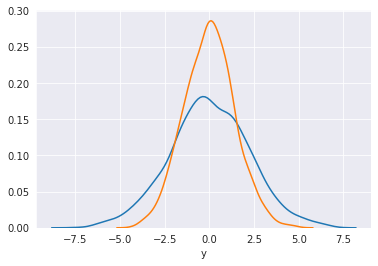

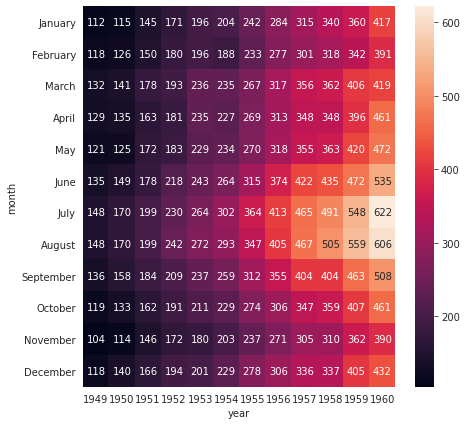

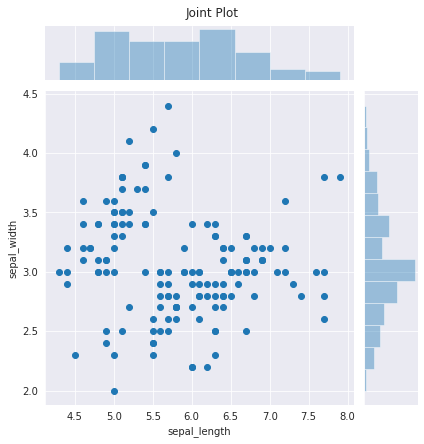

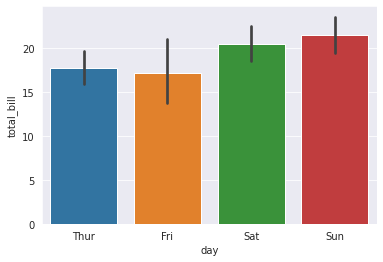

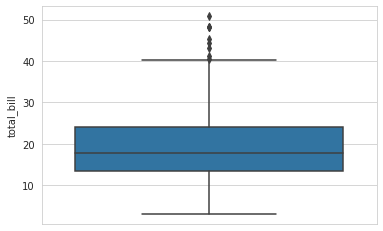

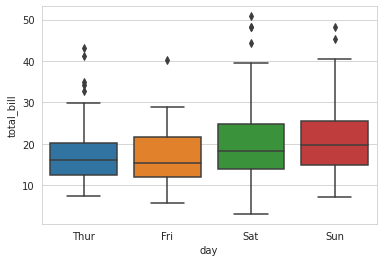

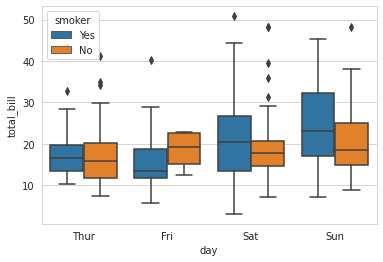

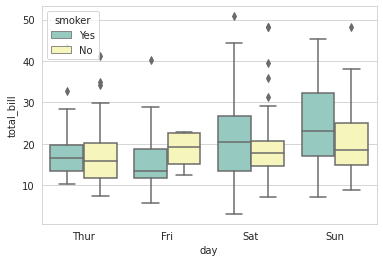

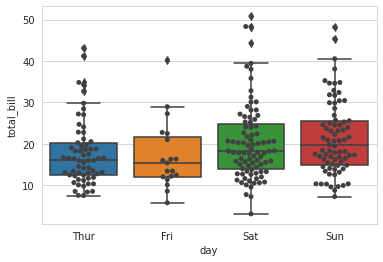

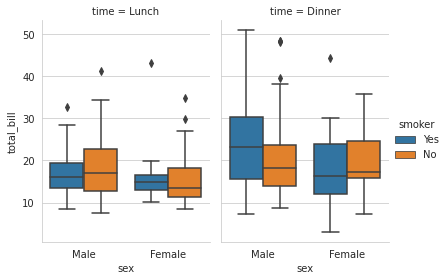

In [ ]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns.distplot
sns.set_style("darkgrid")
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000) # 다변수 정규 분포 mean 인수로 평균 벡터를, cov 인수로 공분산 행렬
data = pd.DataFrame(data, columns=['x', 'y'])
sns.distplot(data['x'], hist=False)  #hist=False를 하면 막대그래프가 삭제 된다.
sns.distplot(data['y'], hist=False)

# load the data
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

# sns.heatmap
flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(7, 7))
ax = sns.heatmap(flights, annot=True, fmt="d") # annot : 각셀의 데이터 값 사용, fmt : 주석 formatting d(숫자)
# 2차원 피벗 테이블 형태의 DataFrame으로 집계가 되어 있으면 heatmap 함수로 간단히 구현

# sns.scatterplot : 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용
iris = sns.load_dataset("iris")
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("Joint Plot", y=1.02)
plt.show()

# sns.barplot
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

# sns.boxplot
sns.set_style("whitegrid") # 화면 스타일 설정
tips = sns.load_dataset("tips")

sns.boxplot(x = "total_bill", orient = "v", data = tips) # orient = "v" : 세로방향
plt.show()

sns.boxplot(x = "day", y = "total_bill", data = tips) # y를 추가 하여 '일변량 질적 자료'
plt.show()

sns.boxplot(x = "day", y = "total_bill",  hue = "smoker", data = tips) # hue = "smoker" 카테고리 값에 따라 추가 색조. '이변량 질적 자료'
plt.show()

sns.boxplot(x = "day", y = "total_bill",  hue = "smoker", palette = "Set3", data = tips) #  palette = "Set3" 색깔 변경
plt.show()

sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25") # swarmplot : 점이 겹치지 않는 범주 형 산점도 추가
plt.show()

sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="box", height=4, aspect=0.7) # factorplot 추가 'bar', 'violin' 등의 그래프를 선택할 수 있다.
plt.show()

In [ ]:
%%html
# Box plot
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99D3C43359C29437228FD1">
